In [22]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
from snake_evo import relu

In [14]:
P=Path(".")/"grid_runs_relu"

In [15]:
out = []
for d in P.iterdir():
    with d.open("rb") as f:
        out.append(pickle.load(f))

In [16]:
data = []
labels = []
for p,s,m,_ in out:
    data.append(m)
    labels.append(f"({p}, {s})")

In [17]:
df = pd.DataFrame(data=np.array(data).T, columns=labels)
df

,"(0.1, 0.5)","(0.0125, 2.0)","(0.05, 2.0)","(0.0125, 0.5)","(0.0125, 0.25)","(0.025, 0.25)","(0.025, 4.0)","(0.05, 4.0)","(0.1, 2.0)","(0.025, 1.0)",...,"(0.0125, 1.0)","(0.1, 1.0)","(0.05, 0.5)","(0.025, 0.5)","(0.1, 0.25)","(0.05, 0.25)","(0.025, 2.0)","(0.2, 0.25)","(0.05, 1.0)","(0.2, 0.5)"
0,0.77,1.62,1.65,0.76,0.68,1.60,1.59,1.65,2.55,0.84,...,1.06,1.69,1.63,1.33,1.53,1.64,1.37,2.41,1.52,1.35
1,1.42,1.72,0.78,1.79,2.00,3.65,1.55,1.34,1.64,1.49,...,0.80,1.00,1.64,1.89,0.81,0.80,1.71,1.80,1.58,0.76
2,1.67,4.66,1.72,1.58,1.68,1.51,1.49,1.72,1.61,0.82,...,1.65,1.25,1.96,1.53,2.10,0.76,1.76,2.53,1.57,0.78
3,1.54,1.59,2.43,1.66,1.51,1.59,0.76,1.43,1.73,1.67,...,1.83,1.62,1.80,2.74,1.57,1.57,1.73,0.87,1.89,2.62
4,1.70,1.09,1.75,2.62,1.35,1.62,1.71,2.12,2.47,0.73,...,2.74,1.71,1.62,1.64,1.59,2.53,1.67,1.45,1.51,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.49,2.52,102.57,1.58,12.59,2.53,3.52,2.60,1.58,28.73,...,1.76,0.74,29.33,2.39,2.53,2.54,59.17,31.48,1.71,92.20
996,2.48,3.54,117.63,2.45,13.52,2.65,2.51,2.63,2.71,23.92,...,1.72,1.76,23.44,3.08,2.50,2.65,50.10,32.64,2.61,94.48
997,2.57,3.46,109.40,2.55,12.90,2.42,3.55,2.60,1.62,28.62,...,2.62,1.62,25.99,3.32,2.59,2.59,52.87,23.97,1.68,95.24
998,1.65,2.48,108.52,2.46,12.72,2.40,3.52,1.65,1.65,24.08,...,2.43,2.60,30.04,1.68,1.60,2.65,54.15,31.73,2.50,92.07


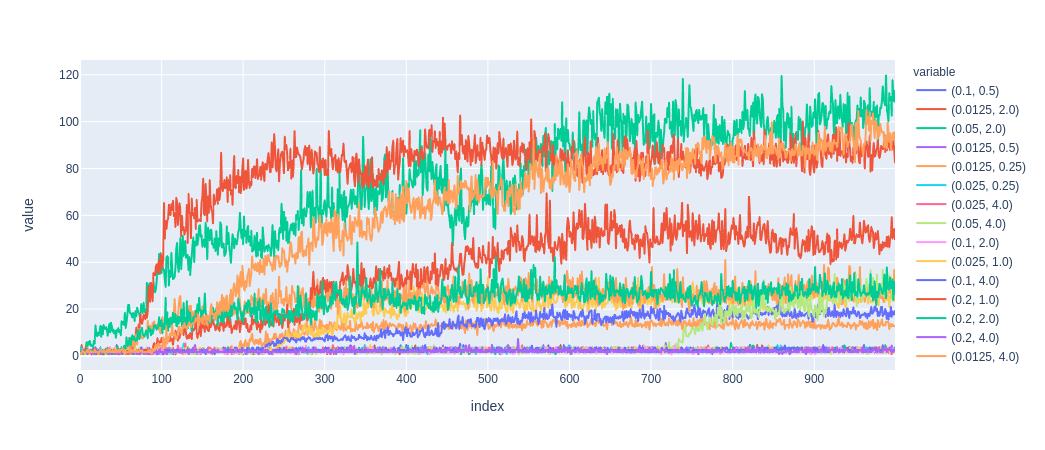

In [18]:
px.line(df)

In [19]:
pops = {(p,s):P for p,s,_,P in out}

In [27]:
best_p = pops[(0.2,0.5)]

In [28]:
best_p.play(
    n_trials=10,
    threshold = 100,
    activation=relu
)

In [29]:
best_a = best_p.pop[np.argmax(best_p.scores)]
for i in range(10):
    best_a.play(
        blocks_height = best_p.blocks_height,
        blocks_width = best_p.blocks_width,
        threshold = 100,
        activation=relu,
        graphical=True,
        diag=True,
        block_size=30,
        tick=0.01
    )

In [25]:
max(best_p.scores)

0.0